#### **Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.pipeline import Pipeline
from feature_engine.selection import (RecursiveFeatureElimination,DropConstantFeatures,DropDuplicateFeatures,)
from termcolor import colored, cprint

#### **Datasets and Analytics**

In [36]:
data1 = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\00_Literature\dataset_1.csv')
print(colored('Datasets Shape: ','blue'), data1.shape)

Datasets Shape:  (50000, 301)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(labels=['target'], axis=1),
    data1['target'],
    test_size=0.3,
    random_state=0)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape)

Shape for X train and X test: (35000, 300) (15000, 300)


In [ ]:
pipe = Pipeline([('constant', DropConstantFeatures(tol=0.998)), ('duplicated', DropDuplicateFeatures()),])
pipe.fit(X_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape)
model = GradientBoostingClassifier(n_estimators=10, max_depth=2, random_state=10,)
sel = RecursiveFeatureElimination(
    variables=None, 
    estimator = model, 
    scoring = 'roc_auc', 
    threshold = 0.0005, 
    cv=2, )
print(colored('Model Fit:', 'blue'), sel.fit(X_train, y_train))

Shape for X train and X test: (35000, 152) (15000, 152)
Model Fit: RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingClassifier(max_depth=2,
                                                                 n_estimators=10,
                                                                 random_state=10),
                            threshold=0.0005)


Model Performance: 0.7989005422137565


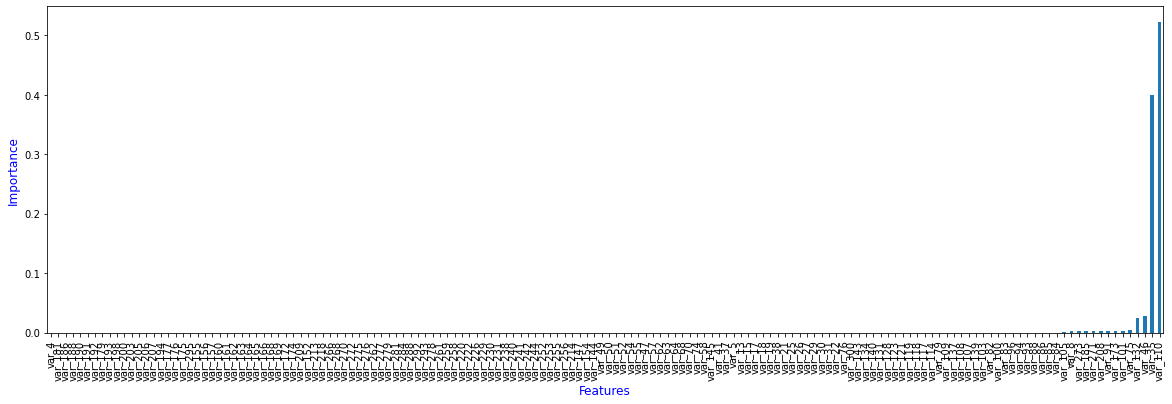

In [32]:
print(colored('Model Performance:', 'blue'), sel.initial_model_performance_)
sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features', fontsize=12, color='b')
plt.ylabel('Importance', fontsize=12, color='b')
plt.show();

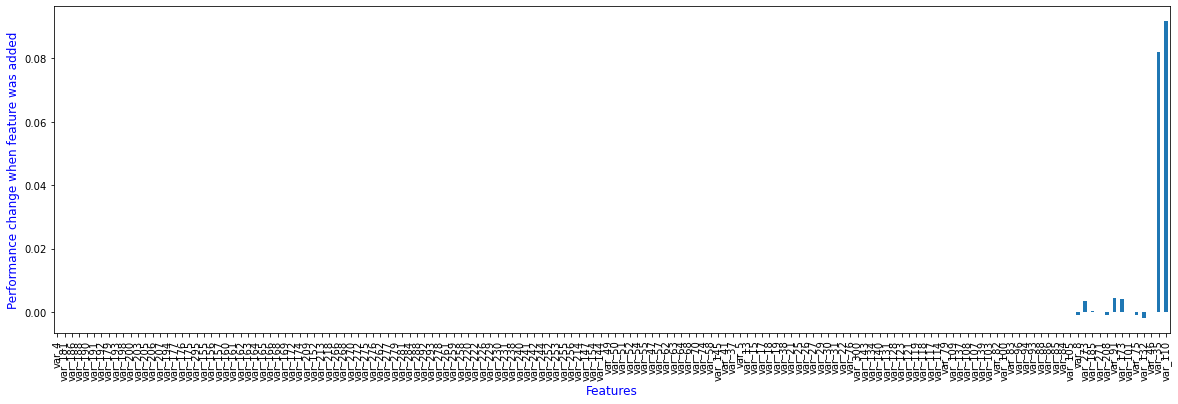

In [33]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features', fontsize=12, color='b')
plt.ylabel('Performance change when feature was added', fontsize=12, color='b')
plt.show();

In [44]:
print(colored('Leng of Features Dtop:', 'blue'), len(sel.features_to_drop_))
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape)
model.fit(X_train, y_train)
y_pred_test = model.predict_proba(X_test)[:, 1]
roc_final = roc_auc_score(y_test, y_pred_test)
print(colored('Test selected features ROC AUC=%f','blue') % (roc_final))

Leng of Features Dtop: 147


ValueError: The number of columns in this dataset is different from the one used to fit this transformer (when using the fit() method).